In [3]:
%matplotlib nbagg
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

In [4]:
np

<module 'numpy' from '/opt/conda/lib/python3.7/site-packages/numpy/__init__.py'>

<IPython.core.display.Javascript object>


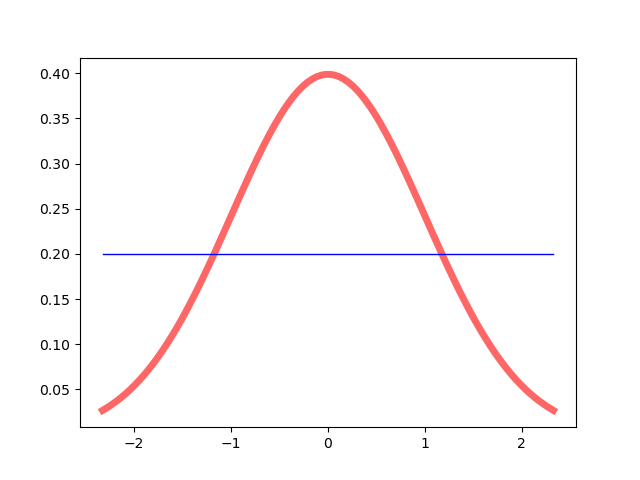

In [6]:
fig, ax = plt.subplots() # 1 seul dessin ; ax fait des dessins => ici plot choisi 
x = np.linspace(norm.ppf(0.01), # norm = loi normale 
                norm.ppf(0.99), 100) # linspace = comme une array en python 

ax.plot(x, norm.pdf(x),
       'r-', lw=5, alpha=0.6) #plot fait du discret avec les données de x 

ax.plot(x, np.full(len(x), 0.2),
       'b-', lw=1) # ici in rajoute 1 dessin sur le premier dessin pour l'enrichir 

fig.show()

In [24]:
import pandas
df = pandas.read_csv("./data/TCL_wt1.tsv", sep= "\t")
df
# à gauche c'est le num de ligne qui ne change jamais 
#type(df) c'est 1 dataframe = 1 serie de vercteurs 
#df.head() => head est une méthode !!!! 
print(df.shape)
df= df.dropna() # permet de se débarasser de lignes bizarres 
print(df.shape)

(2024, 7)
(1746, 7)


In [27]:
df = df.astype({
    'Log2 Corrected Abundance Ratio': float, 
    '-LOG10 Adj.P-val': float } ) #permet de se débarasser des objets et d'avoir ici des floats 
df.describe() # maintenant 2 cols en + 

,Log2 Corrected Abundance Ratio,Abundance Ratio Adj. P-Value: (127. T3 Tc WT) / (126. T0 WT),-LOG10 Adj.P-val
count,1746.000000,1.746000e+03,1746.000000
mean,-0.638626,8.234275e-01,0.384861
std,0.470759,3.509350e-01,1.067665
min,-3.721335,1.034030e-08,0.000000
25%,-0.824011,1.000000e+00,0.000000
50%,-0.511882,1.000000e+00,0.000000
75%,-0.354410,1.000000e+00,0.000000
max,0.846424,1.000000e+00,7.985468


In [36]:
#values = df[['Description', 'Gene Symbol']]
#df.iloc[ :5 , : ] # accéder au 5 premières lignes de toutes les col
#df.iloc[ : , -1 ]
#df.iloc[ :5 , [0,2,3] ]

df.loc[(df['-LOG10 Adj.P-val'] > 0 )  & (df['Log2 Corrected Abundance Ratio'] > 0.0 ) ]
['-LOG10 Adj.P-val'].tolist()  #toutes les lignes respectent les contraintes




[0.691227768,
 0.712943653,
 0.402618043,
 2.580784345,
 2.503645133,
 0.313569022,
 0.910624088,
 1.662133421,
 0.964490826,
 1.816915879,
 2.591602196,
 4.571899347,
 1.604997385,
 0.867514879,
 1.887799128,
 0.029154378,
 5.258216386,
 0.648470173,
 4.29157999,
 4.851297862,
 4.571899347,
 1.85469412,
 3.732993373,
 5.156463067,
 5.105776203,
 1.794017208,
 1.014018129,
 6.091511321,
 4.907875784,
 2.401828628,
 0.507623276,
 1.873756665,
 2.652390664,
 4.16495627,
 1.444561032]

<IPython.core.display.Javascript object>


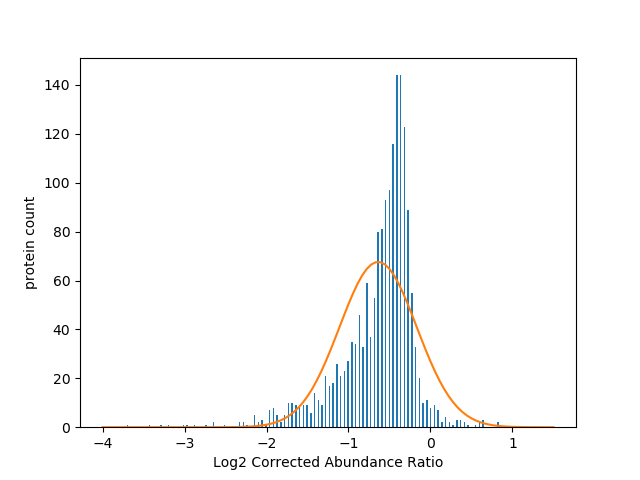

-0.63862621564433 0.4704898017787741


In [65]:
fig, ax = plt.subplots() 
field = 'Log2 Corrected Abundance Ratio'

hist= ax.hist(df[field].tolist(), bins=100, rwidth=0.4 ) 
ax.set_xlabel(field)
ax.set_ylabel('protein count')

fig.show()

#la position de la médiane => plus de wildtype rich que de tetracycline 
#on va utiliser cet échantillon pour estimer la moyenne de la loi normale 
from math import sqrt
_ = df[field].tolist()
n = len(_)
mu = np.mean(_)
s2 = np.std(_)*np.std(_) 
sigma = sqrt((n/(n+1)*s2)) # correction 
print(mu, sigma)


x= np.linspace(-4,1.5,100)
dx = hist[1][1] - hist[1][0]
bar_scale= dx * n # generate PDF domain points

ax.plot(x,norm.pdf(x,loc=mu,scale=sigma)* bar_scale)# scale (déviation standart) 
# on rajoute ça ( loc=mu,scale=sigma) car mu et sigma ne sont pas les standard 0 et 1 
fig.show()



-0.63862621564433 0.4704898017787741


NameError: name 'hist' is not defined